In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
## Define a custom color palette for seaborn
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(palette)
## Create a color map for matplotlib using the defined palette
color_map = colors.ListedColormap(palette)
import warnings
warnings.simplefilter("ignore")


In [711]:

# Read the train and test CSV files

data = pd.read_csv('airline_passenger_satisfaction.csv')

# Print the shape of the data
data.shape


(129880, 24)

In [712]:
# Drop unnecessary columns
data = data.drop('ID', axis=1)
# Check size of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [713]:
# Print the first few rows of the train DataFrame
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


#### EDA 

In [714]:
#ubah spasi di kolom data data dengan tanda underscore
data.columns = [c.replace(' ','_') for c in data.columns]

In [715]:
#ubah spasi di kolom data data dengan tanda underscore
data.columns = [c.replace('-','_') for c in data.columns]

In [716]:
# menampilkan informasi mengenai dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer_Type                           129880 non-null  object 
 3   Type_of_Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight_Distance                         129880 non-null  int64  
 6   Departure_Delay                         129880 non-null  int64  
 7   Arrival_Delay                           129487 non-null  float64
 8   Departure_and_Arrival_Time_Convenience  129880 non-null  int64  
 9   Ease_of_Online_Booking                  129880 non-null  int64  
 10  Check_in_Service                        1298

Fitur dengan Korelasi Tinggi:
['Departure_Delay', 'Arrival_Delay', 'Ease_of_Online_Booking', 'On_board_Service', 'Seat_Comfort', 'Cleanliness', 'Food_and_Drink', 'In_flight_Service', 'In_flight_Wifi_Service', 'In_flight_Entertainment', 'Baggage_Handling']


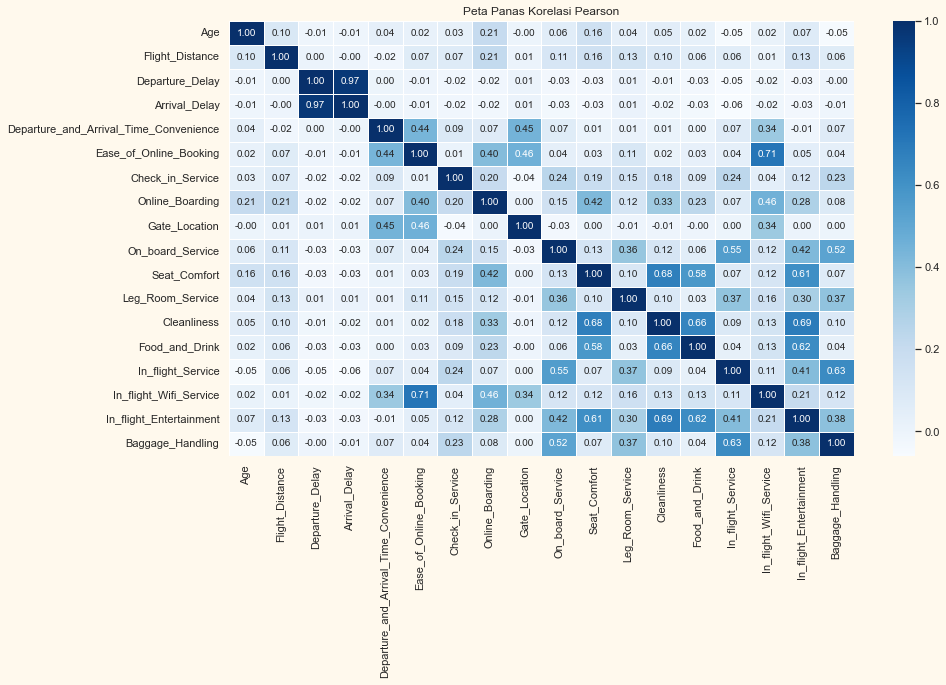

In [717]:
# Memanggil Korelasi Pearson
correlation_matrix = data.corr(method='pearson')

# Memilih Fitur dengan Korelasi Tinggi
threshold = 0.5
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix < 1)
np.fill_diagonal(high_correlation.values, False)
high_correlation_features = [col for col in high_correlation.columns if any(high_correlation[col])]

# Output daftar fitur yang memiliki korelasi tinggi
print("Fitur dengan Korelasi Tinggi:")
print(high_correlation_features)

# Visualisasi Peta Panas Korelasi
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Peta Panas Korelasi Pearson")
plt.show()

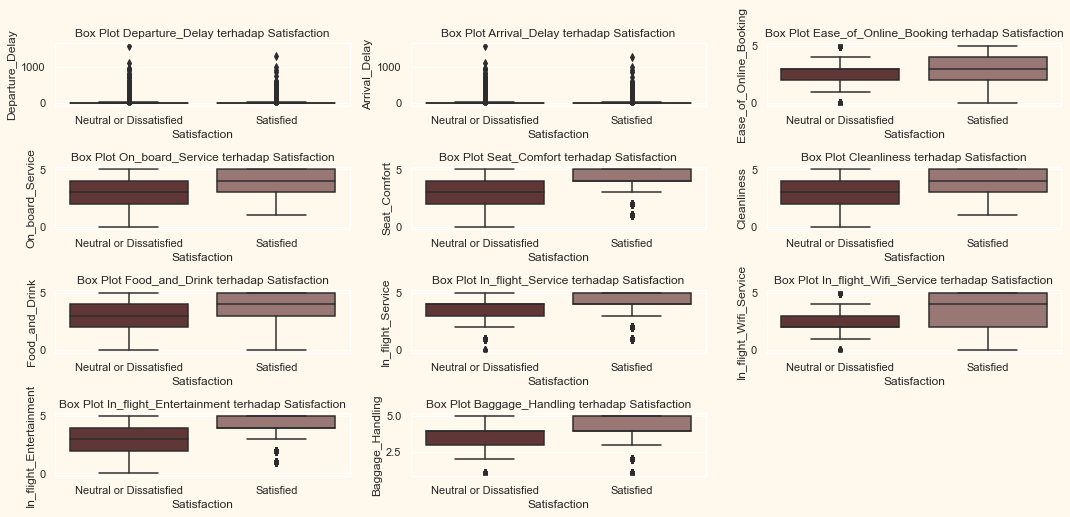

In [718]:
# Memilih kolom yang akan digunakan untuk box plot
# Anda dapat menyesuaikan kolom sesuai kebutuhan
selected_columns = ['Departure_Delay', 'Arrival_Delay', 'Ease_of_Online_Booking', 'On_board_Service', 'Seat_Comfort', 'Cleanliness', 'Food_and_Drink', 'In_flight_Service', 'In_flight_Wifi_Service', 'In_flight_Entertainment', 'Baggage_Handling', 'Satisfaction']

# Melakukan box plot menggunakan Seaborn
plt.figure(figsize=(15, 10))

# Loop melalui setiap fitur untuk membuat box plot
for i, column in enumerate(selected_columns[:-1]):
    plt.subplot(6, 3, i+1)  # Membuat subplot untuk setiap fitur
    sns.boxplot(x='Satisfaction', y=column, data=data)
    plt.title(f'Box Plot {column} terhadap Satisfaction')
    plt.xlabel('Satisfaction')
    plt.ylabel(column)
    plt.tight_layout()

plt.show()

In [719]:
drop_columns = ['Age','Gender','Flight_Distance','Gate_Location', 'Online_Boarding', 'Leg_Room_Service','Check_in_Service','Departure_and_Arrival_Time_Convenience']

In [720]:
data.drop(drop_columns,axis=1,inplace=True)
data.head(100)

,Customer_Type,Type_of_Travel,Class,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
0,First-time,Business,Business,2,5.0,3,3,5,5,5,5,3,5,5,Neutral or Dissatisfied
1,Returning,Business,Business,26,39.0,2,5,4,5,3,5,2,5,5,Satisfied
2,Returning,Business,Business,0,0.0,4,3,5,5,5,3,4,3,3,Satisfied
3,Returning,Business,Business,0,0.0,2,5,5,4,4,5,2,5,5,Satisfied
4,Returning,Business,Business,0,1.0,3,3,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Returning,Personal,Economy Plus,0,0.0,0,5,3,3,3,4,2,3,4,Neutral or Dissatisfied
96,First-time,Business,Economy Plus,0,0.0,3,1,1,1,1,5,3,1,1,Neutral or Dissatisfied
97,Returning,Business,Business,0,11.0,4,4,5,5,3,4,4,4,4,Satisfied
98,Returning,Business,Business,27,18.0,5,4,5,3,3,4,5,4,4,Satisfied


In [721]:
## Create a color map for matplotlib using the defined palette
## Set seaborn settings for plot aesthetics
from matplotlib import colors
sns.set(rc={"figure.figsize" : [15,8]}, font_scale=1.2)
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
## Define a custom color palette for seaborn
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(palette)
color_map = colors.ListedColormap(palette)
data.describe().T.style.background_gradient(cmap=color_map) 

,count,mean,std,min,25%,50%,75%,max
Departure_Delay,129880.000000,14.713713,38.071126,0.000000,0.000000,0.000000,12.000000,1592.000000
Arrival_Delay,129487.000000,15.091129,38.465650,0.000000,0.000000,0.000000,13.000000,1584.000000
Ease_of_Online_Booking,129880.000000,2.756876,1.401740,0.000000,2.000000,3.000000,4.000000,5.000000
On_board_Service,129880.000000,3.383023,1.287099,0.000000,2.000000,4.000000,4.000000,5.000000
Seat_Comfort,129880.000000,3.441361,1.319289,0.000000,2.000000,4.000000,5.000000,5.000000
Cleanliness,129880.000000,3.286326,1.313682,0.000000,2.000000,3.000000,4.000000,5.000000
Food_and_Drink,129880.000000,3.204774,1.329933,0.000000,2.000000,3.000000,4.000000,5.000000
In_flight_Service,129880.000000,3.642193,1.176669,0.000000,3.000000,4.000000,5.000000,5.000000
In_flight_Wifi_Service,129880.000000,2.728696,1.329340,0.000000,2.000000,3.000000,4.000000,5.000000
In_flight_Entertainment,129880.000000,3.358077,1.334049,0.000000,2.000000,4.000000,4.000000,5.000000


In [722]:
data.describe()

,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling
count,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,14.713713,15.091129,2.756876,3.383023,3.441361,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,38.071126,38.465650,1.401740,1.287099,1.319289,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,0.000000,0.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,12.000000,13.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


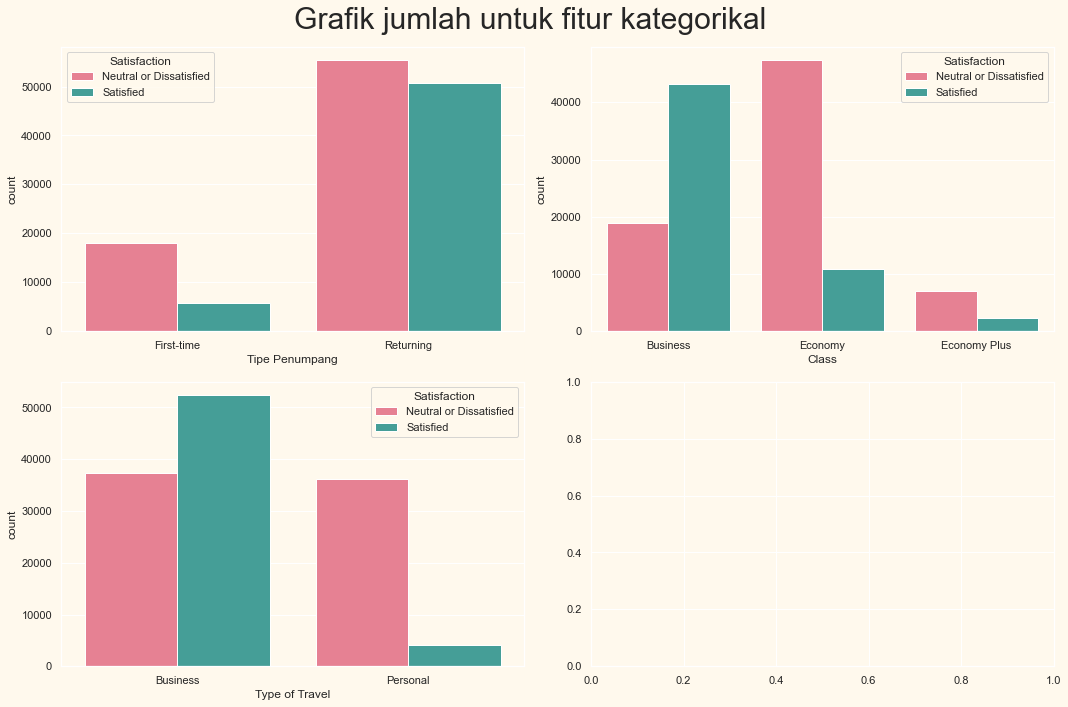

In [723]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
plt.suptitle('Grafik jumlah untuk fitur kategorikal ', fontsize = 30)

ax1 = sns.countplot(x ='Customer_Type', data= data, hue= 'Satisfaction', ax= ax[0, 0], palette="husl" )
ax1.set(xlabel = 'Tipe Penumpang')

ax2 = sns.countplot(x ='Class', data= data, hue= 'Satisfaction', ax= ax[0, 1], palette= "husl")
ax2.set(xlabel = 'Class')

ax3 = sns.countplot(x ='Type_of_Travel', data= data, hue= 'Satisfaction', ax= ax[1, 0],  palette="husl")
ax3.set(xlabel = 'Type of Travel')

# ax4 = sns.countplot(x ='Type of Travel', data= data, hue= 'Satisfaction', ax= ax[1, 1], palette="husl")
# ax4.set(xlabel = 'Type of Travel')
plt.tight_layout()
plt.show()

In [724]:
def calculate_missing_values(Data):
    total_missing = Data.isnull().sum()  # Count the missing values in each column
    percent_missing = round((total_missing / len(Data)) * 100,3)  # Calculate the percentage

    missing_data = pd.DataFrame({
        'Total data yang hilang': total_missing,
        'Persentase data yang hilang': percent_missing
    })

    missing_data = missing_data.sort_values(by='Persentase data yang hilang', ascending=False)
    return missing_data

In [725]:
calculate_missing_values(data)

,Total data yang hilang,Persentase data yang hilang
Arrival_Delay,393,0.303
Customer_Type,0,0.000
Type_of_Travel,0,0.000
Class,0,0.000
Departure_Delay,0,0.000
Ease_of_Online_Booking,0,0.000
On_board_Service,0,0.000
Seat_Comfort,0,0.000
Cleanliness,0,0.000
Food_and_Drink,0,0.000


In [726]:
#the number of missing data is 393 so it is few so we will use the median to fill the data .
data['Arrival_Delay'].fillna(data['Arrival_Delay'].median(), inplace=True)

In [727]:
data['Arrival_Delay'].isnull().any()

False

In [728]:
calculate_missing_values(data)

,Total data yang hilang,Persentase data yang hilang
Customer_Type,0,0.0
Type_of_Travel,0,0.0
Class,0,0.0
Departure_Delay,0,0.0
Arrival_Delay,0,0.0
Ease_of_Online_Booking,0,0.0
On_board_Service,0,0.0
Seat_Comfort,0,0.0
Cleanliness,0,0.0
Food_and_Drink,0,0.0


In [729]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_Type            129880 non-null  object 
 1   Type_of_Travel           129880 non-null  object 
 2   Class                    129880 non-null  object 
 3   Departure_Delay          129880 non-null  int64  
 4   Arrival_Delay            129880 non-null  float64
 5   Ease_of_Online_Booking   129880 non-null  int64  
 6   On_board_Service         129880 non-null  int64  
 7   Seat_Comfort             129880 non-null  int64  
 8   Cleanliness              129880 non-null  int64  
 9   Food_and_Drink           129880 non-null  int64  
 10  In_flight_Service        129880 non-null  int64  
 11  In_flight_Wifi_Service   129880 non-null  int64  
 12  In_flight_Entertainment  129880 non-null  int64  
 13  Baggage_Handling         129880 non-null  int64  
 14  Sati

In [730]:
data.duplicated().sum()

33068

In [731]:

# Assuming 'data' is your DataFrame
data_duplicates = data[data.duplicated()]

# Get the number of rows and columns in the duplicate DataFrame
num_rows, num_columns = data_duplicates.shape

# Get the head and tail of the duplicate rows
head_and_tail = pd.concat([data_duplicates.head(), data_duplicates.tail()])

# Set table background to white and text to black
styled_head_and_tail = head_and_tail.style.set_properties(**{
    'background-color': 'white',
    'color': 'black'
}).set_table_styles([{
    'selector': 'table',
    'props': [('max-width', '250px'), ('max-height', '250px'), ('border-collapse', 'collapse')]
}])

# Display the styled DataFrame
display(styled_head_and_tail)

# Display the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

,Customer_Type,Type_of_Travel,Class,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
171,Returning,Business,Business,0,0.000000,3,5,5,4,5,5,3,5,5,Satisfied
336,Returning,Personal,Economy,0,0.000000,2,4,5,5,5,4,2,5,4,Neutral or Dissatisfied
356,Returning,Business,Business,0,0.000000,2,5,5,4,4,5,2,5,5,Satisfied
358,Returning,Business,Business,0,0.000000,0,5,4,4,3,5,0,5,5,Satisfied
360,Returning,Business,Business,0,0.000000,5,5,5,4,5,5,5,5,5,Satisfied
129863,Returning,Business,Business,0,0.000000,5,5,4,3,3,5,1,5,5,Satisfied
129864,Returning,Business,Business,0,0.000000,3,5,4,5,2,5,3,5,5,Satisfied
129868,First-time,Business,Economy,0,0.000000,2,4,5,5,5,4,2,5,4,Neutral or Dissatisfied
129873,Returning,Personal,Economy Plus,0,0.000000,4,1,3,3,3,4,4,3,3,Neutral or Dissatisfied
129876,Returning,Personal,Economy Plus,0,0.000000,3,5,2,2,2,4,3,2,5,Neutral or Dissatisfied


Number of rows: 33068
Number of columns: 15


In [732]:
# Find and display duplicate rows in the data DataFrame
data_duplicates = data[data.duplicated()]
data_duplicates

,Customer_Type,Type_of_Travel,Class,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
171,Returning,Business,Business,0,0.0,3,5,5,4,5,5,3,5,5,Satisfied
336,Returning,Personal,Economy,0,0.0,2,4,5,5,5,4,2,5,4,Neutral or Dissatisfied
356,Returning,Business,Business,0,0.0,2,5,5,4,4,5,2,5,5,Satisfied
358,Returning,Business,Business,0,0.0,0,5,4,4,3,5,0,5,5,Satisfied
360,Returning,Business,Business,0,0.0,5,5,5,4,5,5,5,5,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129863,Returning,Business,Business,0,0.0,5,5,4,3,3,5,1,5,5,Satisfied
129864,Returning,Business,Business,0,0.0,3,5,4,5,2,5,3,5,5,Satisfied
129868,First-time,Business,Economy,0,0.0,2,4,5,5,5,4,2,5,4,Neutral or Dissatisfied
129873,Returning,Personal,Economy Plus,0,0.0,4,1,3,3,3,4,4,3,3,Neutral or Dissatisfied


In [733]:
data.duplicated().any()

True

In [734]:
data = data.drop_duplicates()

In [735]:
data.duplicated().any()

False

In [736]:
from IPython.display import display, HTML

In [737]:
# Menampilkan jumlah data duplikat
print(f'Terdapat {data.duplicated().sum()} data duplikat pada dataset')

# Mendapatkan data yang duplikat
duplicate_data = data[data.duplicated(keep=False)]

# Menampilkan tabel dengan style yang diinginkan
styled_table = duplicate_data.style.set_properties(**{'background-color': 'white', 'color': 'black'})
display(HTML(styled_table.render()))

Terdapat 0 data duplikat pada dataset


,Customer_Type,Type_of_Travel,Class,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction


In [738]:
print(f'Terdapat {data.duplicated().sum()} data duplikat pada dataset')
data[data.duplicated(keep=False)]

Terdapat 0 data duplikat pada dataset


,Customer_Type,Type_of_Travel,Class,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction


In [739]:
def calculate_outliers_percentage(data):

    # Menghitung rentang interkuartil (IQR) untuk setiap kolom
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier dalam setiap kolom
    num_outliers = ((data < lower_bound) | (data > upper_bound)).sum()

    # Menghitung persentase outlier dalam setiap kolom
    pct_outliers = round(num_outliers / len(data) * 100 , 4)

    return pct_outliers

In [740]:
outliers_data = pd.DataFrame(calculate_outliers_percentage(data), columns=['% Outliers'])
outliers_data.index.name = 'Column Name'
outliers_data.reset_index(inplace=True)
outliers_data

,Column Name,% Outliers
0,Arrival_Delay,11.1050
1,Baggage_Handling,8.2417
2,Class,0.0000
3,Cleanliness,0.0000
4,Customer_Type,0.0000
5,Departure_Delay,10.9480
6,Ease_of_Online_Booking,0.0000
7,Food_and_Drink,0.0000
8,In_flight_Entertainment,0.0000
9,In_flight_Service,8.1302


In [741]:
# colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
# colors1 = sns.color_palette(['#1337f5'], 1)


# numerical = data.select_dtypes(exclude='object')
# n = len(numerical)

# for col in numerical:
#   fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
#   plt.suptitle(f"Distribution of {col}")
#   sns.boxplot(data=data, x=col, ax=ax1, palette=colors1)
#   ax1.set_xlabel(None)
#   ax1.get_xaxis().set_ticks([])
#   sns.histplot(data=data, x=col, ax=ax2, palette=colors1)
#   plt.subplots_adjust(hspace=0)
#   print("\n")
#   plt.show()

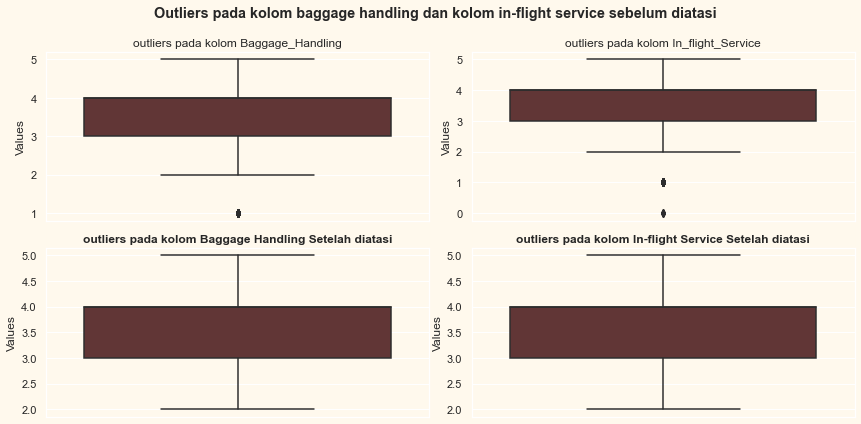

In [742]:
# Simpan kolom 'Baggage_Handling' dan 'In_flight_Service' ke dalam variabel
cols_to_process = ['Baggage_Handling', 'In_flight_Service']

# Visualisasi boxplot sebelum pengisian nilai outliers
plt.figure(figsize=(12, 6))
plt.suptitle("Outliers pada kolom baggage handling dan kolom in-flight service sebelum diatasi", weight="bold")

for i, col in enumerate(cols_to_process):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data, y=col)
    plt.title(f"outliers pada kolom {col}")
    plt.ylabel("Values")

# Menghitung nilai rata-rata kolom yang akan digunakan untuk imputasi
mean_values = data[cols_to_process].mean()

# Penggantian outliers dengan nilai rata-rata
for col in cols_to_process:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].apply(lambda x: mean_values[col] if x < lower_bound or x > upper_bound else x)

# Visualisasi boxplot setelah pengisian nilai outliers
plt.subplot(2, 2, 3)
sns.boxplot(data=data, y='Baggage_Handling')
plt.title("outliers pada kolom Baggage Handling Setelah diatasi", weight="bold")
plt.ylabel("Values")

plt.subplot(2, 2, 4)
sns.boxplot(data=data, y='In_flight_Service')
plt.title("outliers pada kolom In-flight Service Setelah diatasi", weight="bold")
plt.ylabel("Values")

plt.tight_layout()
plt.show()

In [743]:
baghandifs = ['Arrival_Delay', 'Departure_Delay','Baggage_Handling', 'In_flight_Service']
data[baghandifs].describe().style.background_gradient(cmap= color_map)

,Arrival_Delay,Departure_Delay,Baggage_Handling,In_flight_Service
count,96812.000000,96812.000000,96812.000000,96812.000000
mean,20.147048,19.686403,3.739105,3.746229
std,43.325268,42.972842,0.950157,0.949783
min,0.000000,0.000000,2.000000,2.000000
25%,0.000000,0.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000
75%,21.000000,21.000000,4.000000,4.000000
max,1584.000000,1592.000000,5.000000,5.000000


In [744]:
arrival_dept_depaly = ['Arrival_Delay', 'Departure_Delay']
data[arrival_dept_depaly].describe().style.background_gradient(cmap= color_map)

,Arrival_Delay,Departure_Delay
count,96812.000000,96812.000000
mean,20.147048,19.686403
std,43.325268,42.972842
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.000000,3.000000
75%,21.000000,21.000000
max,1584.000000,1592.000000


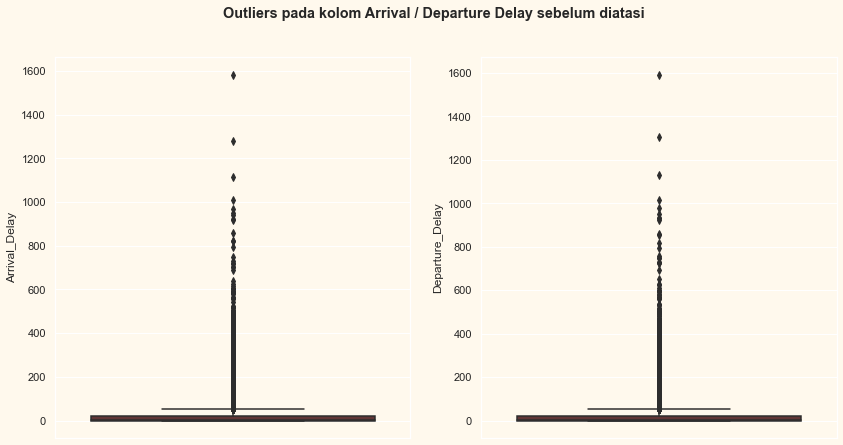

In [745]:
plt.figure(figsize = (14,7))

plt.suptitle("Outliers pada kolom Arrival / Departure Delay sebelum diatasi", weight="bold")
for i, col in enumerate(arrival_dept_depaly):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=data, y=col)

plt.show()

In [746]:
# Menampilkan jumlah penumpang dengan penundaan kedatangan (Arrival Delay) dan penundaan keberangkatan (Departure Delay) lebih dari 400 sebelum penanganan outlier
print(f"the number of the passengers arrival delay > 400 before handling outliers -- {len(data.loc[(data['Arrival_Delay'] > 400)])}".title())
print(f"the number of the passengers Departure delay > 400 before handling outliers -- {len(data.loc[(data['Departure_Delay'] > 400)])}".title())
print("**"*50)
# Menghitung rata-rata dari kolom 'Arrival_Delay' dan 'Departure_Delay'
mean_arrival = data['Arrival_Delay'].mean()
# Mengganti nilai yang lebih besar dari 400 dalam kolom 'Arrival_Delay' dengan nilai rata-rata
data.loc[(data['Arrival_Delay'] > 400), 'Arrival_Delay'] = mean_arrival
# Menghitung rata-rata dari kolom 'Departure_Delay'
mean_dept = data['Departure_Delay'].mean()

# Mengganti nilai yang lebih besar dari 400 dalam kolom 'Departure_Delay' dengan nilai rata-rata
data.loc[(data['Departure_Delay'] > 400), 'Departure_Delay'] = mean_dept

# Menampilkan jumlah penumpang dengan penundaan kedatangan dan keberangkatan yang masih lebih dari 400 setelah penanganan outlier
print("After Handling 2 Columns with replace outliers by mean")
print("**"*50)
print(f"the number of the passengers arrival delay > 400 -- {len(data.loc[(data['Arrival_Delay'] > 400)])}".title())
print(f"the number of the passengers Departure delay > 400 -- {len(data.loc[(data['Departure_Delay'] > 400)])}".title())

The Number Of The Passengers Arrival Delay > 400 Before Handling Outliers -- 113
The Number Of The Passengers Departure Delay > 400 Before Handling Outliers -- 102
****************************************************************************************************
After Handling 2 Columns with replace outliers by mean
****************************************************************************************************
The Number Of The Passengers Arrival Delay > 400 -- 0
The Number Of The Passengers Departure Delay > 400 -- 0


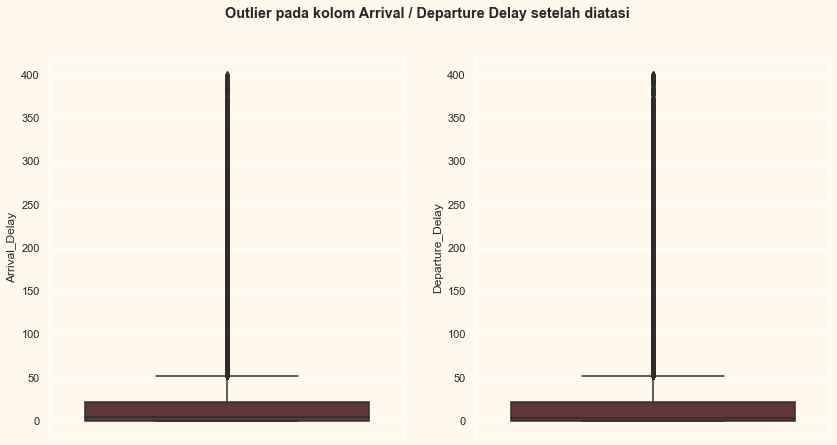

In [747]:
# Membuat gambar (figure) untuk visualisasi dengan ukuran 14x7 inci
plt.figure(figsize = (14,7))

plt.suptitle("Outlier pada kolom Arrival / Departure Delay setelah diatasi", weight="bold")

# Looping melalui kolom-kolom 'Arrival_Delay' dan 'Departure_Delay'
for i, col in enumerate(arrival_dept_depaly):
    # Membuat subplot untuk setiap kolom, menempatkannya dalam grid 1x2 (1 baris, 2 kolom)
    plt.subplot(1, 2, i+1)
    # Menggambar boxplot untuk kolom saat ini pada posisi subplot yang sesuai
    sns.boxplot(data=data, y=col)

plt.show()

## Data encoding


In [748]:
data.head()

,Customer_Type,Type_of_Travel,Class,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
0,First-time,Business,Business,2.0,5.0,3,3,5,5,5,5.0,3,5,5.0,Neutral or Dissatisfied
1,Returning,Business,Business,26.0,39.0,2,5,4,5,3,5.0,2,5,5.0,Satisfied
2,Returning,Business,Business,0.0,0.0,4,3,5,5,5,3.0,4,3,3.0,Satisfied
3,Returning,Business,Business,0.0,0.0,2,5,5,4,4,5.0,2,5,5.0,Satisfied
4,Returning,Business,Business,0.0,1.0,3,3,4,5,4,3.0,3,3,3.0,Satisfied


In [749]:
#melakukan label encoding pada data kategorikal di dataset

le = LabelEncoder()

cat = ['Satisfaction', 'Customer_Type', 'Type_of_Travel', 'Class']
for name in cat:
    data[name] = le.fit_transform(data[name])

In [750]:
# print the unique values for our categorical values
print(f"satisfaction diubah menjadi: {data['Satisfaction'].unique()}")
print(f"Customer Type diubah menjadi: {data['Customer_Type'].unique()}")
print(f"Type  of Travel diubah menjadi: {data['Type_of_Travel'].unique()}")
print(f"Class diubah menjadi: {data['Class'].unique()}")
data.head()

satisfaction diubah menjadi: [0 1]
Customer Type diubah menjadi: [0 1]
Type  of Travel diubah menjadi: [0 1]
Class diubah menjadi: [0 1 2]


,Customer_Type,Type_of_Travel,Class,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
0,0,0,0,2.0,5.0,3,3,5,5,5,5.0,3,5,5.0,0
1,1,0,0,26.0,39.0,2,5,4,5,3,5.0,2,5,5.0,1
2,1,0,0,0.0,0.0,4,3,5,5,5,3.0,4,3,3.0,1
3,1,0,0,0.0,0.0,2,5,5,4,4,5.0,2,5,5.0,1
4,1,0,0,0.0,1.0,3,3,4,5,4,3.0,3,3,3.0,1


In [751]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96812 entries, 0 to 129879
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_Type            96812 non-null  int32  
 1   Type_of_Travel           96812 non-null  int32  
 2   Class                    96812 non-null  int32  
 3   Departure_Delay          96812 non-null  float64
 4   Arrival_Delay            96812 non-null  float64
 5   Ease_of_Online_Booking   96812 non-null  int64  
 6   On_board_Service         96812 non-null  int64  
 7   Seat_Comfort             96812 non-null  int64  
 8   Cleanliness              96812 non-null  int64  
 9   Food_and_Drink           96812 non-null  int64  
 10  In_flight_Service        96812 non-null  float64
 11  In_flight_Wifi_Service   96812 non-null  int64  
 12  In_flight_Entertainment  96812 non-null  int64  
 13  Baggage_Handling         96812 non-null  float64
 14  Satisfaction         

In [752]:
data.dtypes

Customer_Type                int32
Type_of_Travel               int32
Class                        int32
Departure_Delay            float64
Arrival_Delay              float64
Ease_of_Online_Booking       int64
On_board_Service             int64
Seat_Comfort                 int64
Cleanliness                  int64
Food_and_Drink               int64
In_flight_Service          float64
In_flight_Wifi_Service       int64
In_flight_Entertainment      int64
Baggage_Handling           float64
Satisfaction                 int32
dtype: object

In [753]:
data.shape

(96812, 15)

## Membuat dataset yang sudah bersih

In [754]:
# data_cleaned = pd.DataFrame(data)

In [755]:
# # Menyimpan DataFrame ke dalam file CSV
# data_cleaned.to_csv('data_bersih.csv', index=False) 

## Data Splitting

In [756]:
# split dataset c


X = data.drop(columns= 'Satisfaction') 
y = data.Satisfaction



In [757]:
# split()  method generate indices to split data into training and test set.
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
cnt = 1
for train_index, val_index in k_fold.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(val_index)}')
    cnt += 1

Fold:1, Train set: 87130, Test set:9682
Fold:2, Train set: 87130, Test set:9682
Fold:3, Train set: 87131, Test set:9681
Fold:4, Train set: 87131, Test set:9681
Fold:5, Train set: 87131, Test set:9681
Fold:6, Train set: 87131, Test set:9681
Fold:7, Train set: 87131, Test set:9681
Fold:8, Train set: 87131, Test set:9681
Fold:9, Train set: 87131, Test set:9681
Fold:10, Train set: 87131, Test set:9681


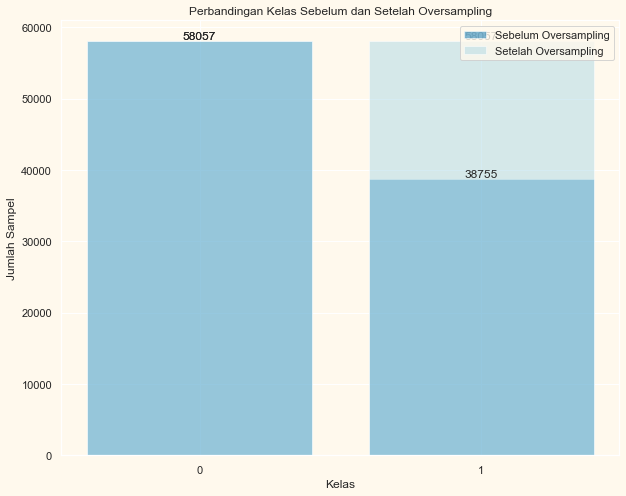

In [758]:
from collections import Counter
# Inisialisasi RandomOverSampler dengan random_state=42
ROS = RandomOverSampler(random_state=42)

# Oversampling data
X_resampled, y_resampled = ROS.fit_resample(X, y)

# Menghitung jumlah kelas sebelum dan sesudah oversampling
counter_before = Counter(y)
counter_after = Counter(y_resampled)

# Membuat plot untuk visualisasi perbandingan kelas sebelum dan setelah oversampling
custom_palette = ["#0072B2", "#ADD8E6"]

plt.figure(figsize=(10, 8))

sns.set_palette(custom_palette)

# Bar plot untuk kelas sebelum oversampling
for i, (key, value) in enumerate(counter_before.items()):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')
plt.bar(counter_before.keys(), counter_before.values(), alpha=0.5, label='Sebelum Oversampling')

# Bar plot untuk kelas setelah oversampling
for i, (key, value) in enumerate(counter_after.items()):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')
plt.bar(counter_after.keys(), counter_after.values(), alpha=0.5, label='Setelah Oversampling')

plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Perbandingan Kelas Sebelum dan Setelah Oversampling')


# Tambahkan teks '0' dan '1' di bawah setiap bar plot
plt.xticks(range(len(counter_before)), ['0', '1'])

plt.legend()
plt.show()


In [759]:
data.describe()

,Customer_Type,Type_of_Travel,Class,Departure_Delay,Arrival_Delay,Ease_of_Online_Booking,On_board_Service,Seat_Comfort,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
count,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000,96812.000000
mean,0.806119,0.325053,0.650198,19.117434,19.536789,2.731366,3.290160,3.365306,3.234620,3.179575,3.746229,2.711771,3.295346,3.739105,0.400312
std,0.395339,0.468397,0.637098,38.657568,38.883564,1.416500,1.307177,1.328343,1.325253,1.340652,0.949783,1.333445,1.340572,0.950157,0.489964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,1.000000,0.000000,1.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,21.000000,21.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,1.000000,1.000000,2.000000,400.000000,400.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [760]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi terhadap data
scaled_data = scaler.fit_transform(data)

In [761]:
## standarisasi
columns_to_scale = ['Customer_Type', 'Type_of_Travel','Class', 'Departure_Delay', 'Arrival_Delay', 'Ease_of_Online_Booking', 'On_board_Service', 'Seat_Comfort', 'Cleanliness', 'Food_and_Drink', 'In_flight_Service', 'In_flight_Wifi_Service', 'In_flight_Entertainment', 'Baggage_Handling', 'Satisfaction']
scaler = StandardScaler()



In [762]:
# hasil standarisasi
scaled_values = scaler.fit_transform(data[columns_to_scale])
data[columns_to_scale] = scaled_values
aggregated_data = data[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).T.style.background_gradient(cmap=color_map)
aggregated_data

,mean,min,max,median,std
Customer_Type,-0.000000,-2.039070,0.490420,0.490420,1.000005
Type_of_Travel,-0.000000,-0.693972,1.440980,-0.693972,1.000005
Class,0.000000,-1.020568,2.118684,0.549058,1.000005
Departure_Delay,-0.000000,-0.494535,9.852781,-0.416930,1.000005
Arrival_Delay,-0.000000,-0.502446,9.784730,-0.399574,1.000005
Ease_of_Online_Booking,0.000000,-1.928260,1.601585,0.189647,1.000005
On_board_Service,0.000000,-2.517010,1.308047,-0.221976,1.000005
Seat_Comfort,0.000000,-2.533474,1.230633,0.477811,1.000005
Cleanliness,-0.000000,-2.440768,1.332115,-0.177038,1.000005
Food_and_Drink,0.000000,-2.371675,1.357872,-0.133947,1.000005


In [763]:
print (scaled_values)

[[-2.03906964 -0.69397198 -1.02056808 ...  1.27159423  1.32704541
  -0.81702731]
 [ 0.49041974 -0.69397198 -1.02056808 ...  1.27159423  1.32704541
   1.22394929]
 [ 0.49041974 -0.69397198 -1.02056808 ... -0.22031433 -0.77788028
   1.22394929]
 ...
 [ 0.49041974  1.44098037  2.11868358 ... -0.22031433  1.32704541
  -0.81702731]
 [ 0.49041974  1.44098037  2.11868358 ... -0.22031433  1.32704541
   1.22394929]
 [ 0.49041974  1.44098037  2.11868358 ... -0.9662686  -0.21950271
  -0.81702731]]


### Membangun Model

In [764]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='YlOrBr',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            # f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}".format(
                accuracy,precision,recall,fontsize=16, weight='bold')
        
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
# # MAKE THE HEATMAP VISUALIZATION
# plt.figure(figsize=figsize)
# heatmap = sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

# # Mengatur ukuran dan ketebalan font pada label sumbu dan judul
# plt.xticks(fontsize=12, weight='bold')  # Menyesuaikan label sumbu x
# plt.yticks(fontsize=12, weight='bold')  # Menyesuaikan label sumbu y
# if xyplotlabels:
#     plt.ylabel('True label', fontsize=14, weight='bold')
#     plt.xlabel('Predicted label' + stats_text, fontsize=14, weight='bold')
# else:
#     plt.xlabel(stats_text, fontsize=14, weight='bold')

# if title:
#     plt.title(title, fontsize=16, weight='bold')

# plt.show()

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label' , fontsize=18, weight='bold')
        plt.xlabel('Predicted label' + stats_text , fontsize=18, weight='bold')
    else:
        plt.xlabel(stats_text, fontsize=16, weight='bold')

    if title:
        plt.title(title)

In [765]:
from sklearn.neighbors import KNeighborsClassifier

In [766]:
knn_model= KNeighborsClassifier()

In [767]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X):
    X_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    knn_model.fit(X_fold, y_train_fold)

    yknn_val_pred = knn_model.predict(X_val_fold)

    knnscore = accuracy_score(y_val_fold, yknn_val_pred)
    accuracy_scores.append(knnscore)

In [768]:
accuracy_scores

[0.8539557942573849,
 0.8591200165255113,
 0.8540440037186241,
 0.8555934304307407,
 0.8556967255448817,
 0.8550769548600351,
 0.8577626278277037,
 0.8501187893812623,
 0.8548703646317529,
 0.8646834004751576]

In [769]:
avgknn_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("Akurasi rata-rata algoritma knn dengan k-fold cross-validation : {:.2f}%".format(
    avgknn_accuracy * 100))

Akurasi rata-rata algoritma knn dengan k-fold cross-validation : 85.61%


In [770]:
classification_rep = classification_report(y_val_fold, yknn_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5904
           1       0.85      0.79      0.82      3777

    accuracy                           0.86      9681
   macro avg       0.86      0.85      0.86      9681
weighted avg       0.86      0.86      0.86      9681



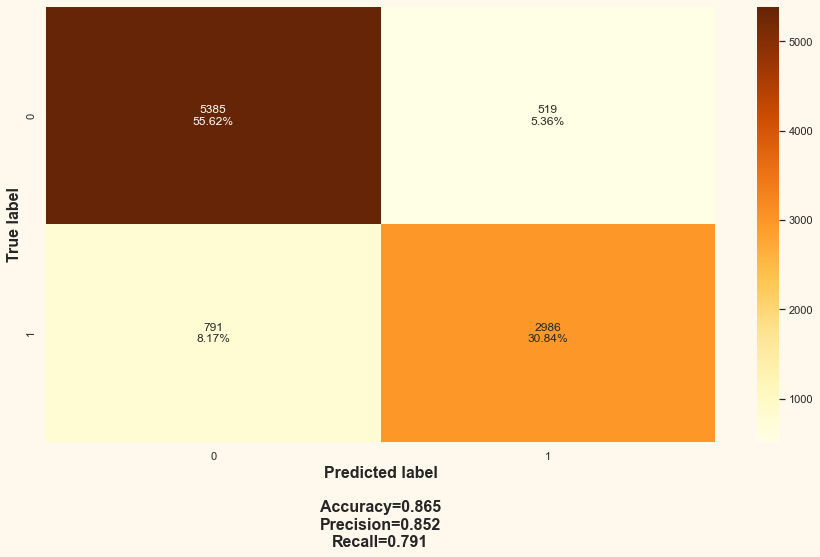

In [771]:
cm = confusion_matrix(y_val_fold, yknn_val_pred)
make_confusion_matrix(cm)

In [772]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [773]:
adaboost_model  = AdaBoostClassifier(n_estimators=100, random_state=4)

In [774]:
accuracy_scores = []

for train_index, val_index in k_fold.split(X):

    X_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    adaboost_model.fit(X_fold, y_train_fold)

    y_val_pred = adaboost_model.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores.append(accuracy)
    

In [775]:
accuracy_scores

[0.9046684569303863,
 0.9009502168973352,
 0.9065179217023035,
 0.9037289536204938,
 0.9088937093275488,
 0.9021795269083772,
 0.9022828220225183,
 0.9026960024790828,
 0.9051750852184691,
 0.9037289536204938]

In [776]:
avgAbaboosting_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("akurasi rata-rata algoritma adaboost dengan pengujian k-fold cross-validation : {:.2f}%".format(
    avgAbaboosting_accuracy * 100))

akurasi rata-rata algoritma adaboost dengan pengujian k-fold cross-validation : 90.41%


In [777]:
classification_rep = classification_report(y_val_fold, y_val_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      5904
           1       0.90      0.85      0.87      3777

    accuracy                           0.90      9681
   macro avg       0.90      0.89      0.90      9681
weighted avg       0.90      0.90      0.90      9681



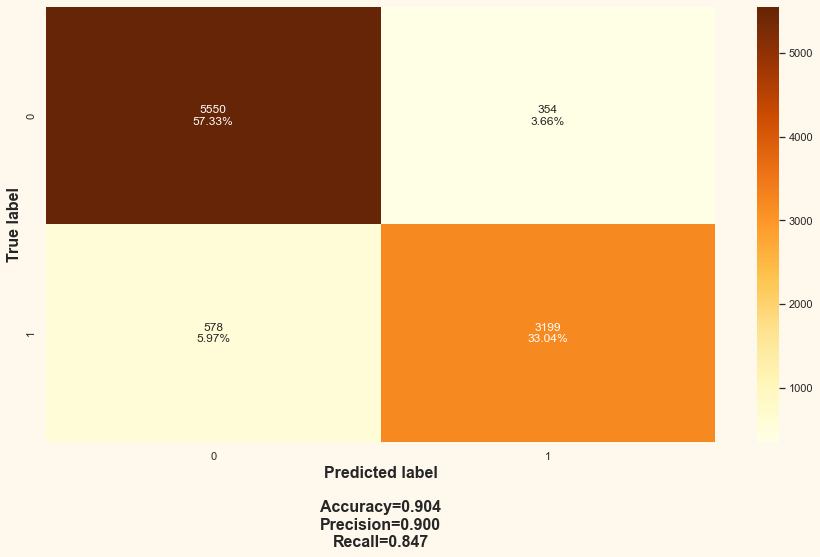

In [778]:
cm = confusion_matrix(y_val_fold, y_val_pred)
make_confusion_matrix(cm)

In [779]:
model_accuracies = {}
model_accuracies['KNeighborsClassifier'] = avgknn_accuracy
model_accuracies['AdaBoosting Classifier'] = avgAbaboosting_accuracy

In [780]:
results = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])
results = results.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Blues')
results

,Model,Accuracy
1,AdaBoosting Classifier,0.904082
0,KNeighborsClassifier,0.856092


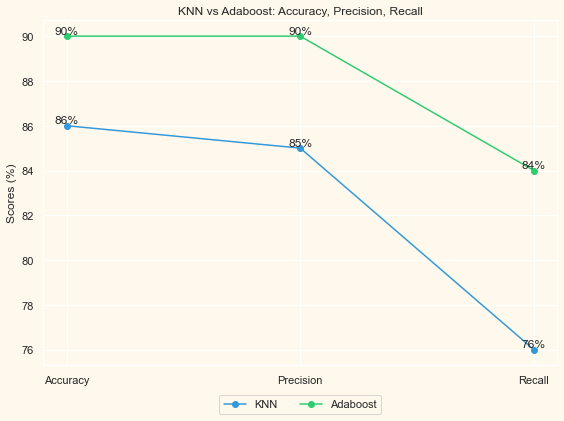

In [781]:
import matplotlib.pyplot as plt

# Nilai-nilai akurasi, presisi, dan recall untuk KNN dan Adaboost
knn_accuracy = 0.86 * 100
knn_precision = 0.85 * 100
knn_recall = 0.76 * 100

adaboost_accuracy = 0.90 * 100
adaboost_precision = 0.90 * 100
adaboost_recall = 0.84 * 100

# Menyusun data untuk line graph
labels = ['Accuracy', 'Precision', 'Recall']
knn_scores = [knn_accuracy, knn_precision, knn_recall]
adaboost_scores = [adaboost_accuracy, adaboost_precision, adaboost_recall]

x = range(len(labels))

# Membuat line graph dengan warna yang telah ditentukan
plt.figure(figsize=(8, 6))  # Mengatur ukuran grafik

plt.plot(labels, knn_scores, marker='o', linestyle='-', color='#3498db', label='KNN')  
plt.plot(labels, adaboost_scores, marker='o', linestyle='-', color='#2ecc71', label='Adaboost')  
plt.title('KNN vs Adaboost: Accuracy, Precision, Recall')
plt.ylabel('Scores (%)')  


# Menambahkan nilai di atas setiap titik pada line graph sebagai persentase (tanpa desimal)
offset = 0.1  # Menyesuaikan offset teks
for i, (knn, adaboost) in enumerate(zip(knn_scores, adaboost_scores)):
    plt.text(labels[i], knn + offset, '{:.0f}%'.format(knn), ha='center')
    plt.text(labels[i], adaboost + offset, '{:.0f}%'.format(adaboost), ha='center')

# Menampilkan legenda di atas grafik
plt.legend(bbox_to_anchor=(0.5, -0.07), loc='upper center', ncol=2)

plt.grid(True)
plt.tight_layout()

plt.show()


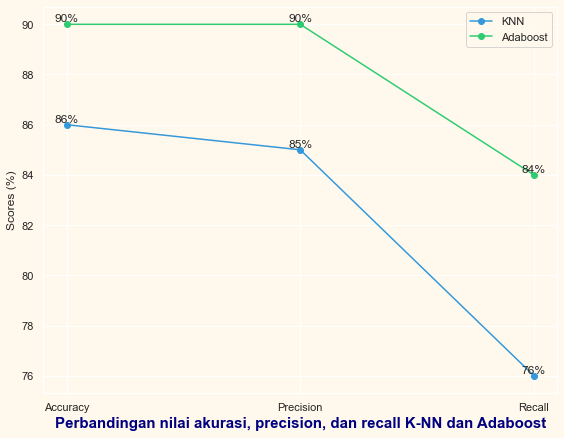

In [782]:
import matplotlib.pyplot as plt

knn_accuracy = 0.86 * 100
knn_precision = 0.85 * 100
knn_recall = 0.76 * 100

adaboost_accuracy = 0.90 * 100
adaboost_precision = 0.90 * 100
adaboost_recall = 0.84 * 100

labels = ['Accuracy', 'Precision', 'Recall']
knn_scores = [knn_accuracy, knn_precision, knn_recall]
adaboost_scores = [adaboost_accuracy, adaboost_precision, adaboost_recall]

x = range(len(labels))

plt.figure(figsize=(8, 6))

plt.plot(labels, knn_scores, marker='o', linestyle='-', color='#3498db', label='KNN')
plt.plot(labels, adaboost_scores, marker='o', linestyle='-', color='#2ecc71', label='Adaboost')
plt.ylabel('Scores (%)')

offset = 0.1
for i, (knn, adaboost) in enumerate(zip(knn_scores, adaboost_scores)):
    plt.text(labels[i], knn + offset, '{:.0f}%'.format(knn), ha='center')
    plt.text(labels[i], adaboost + offset, '{:.0f}%'.format(adaboost), ha='center')

# Menampilkan legenda di kanan atas grafik
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.grid(True)
plt.tight_layout()

# Menempatkan judul di bawah label "KNN" dan "Adaboost" dengan teks tebal dan warna navy
plt.xlabel('Perbandingan nilai akurasi, precision, dan recall K-NN dan Adaboost', fontsize=15, weight='bold', color='navy', y=-0.15)
plt.show()

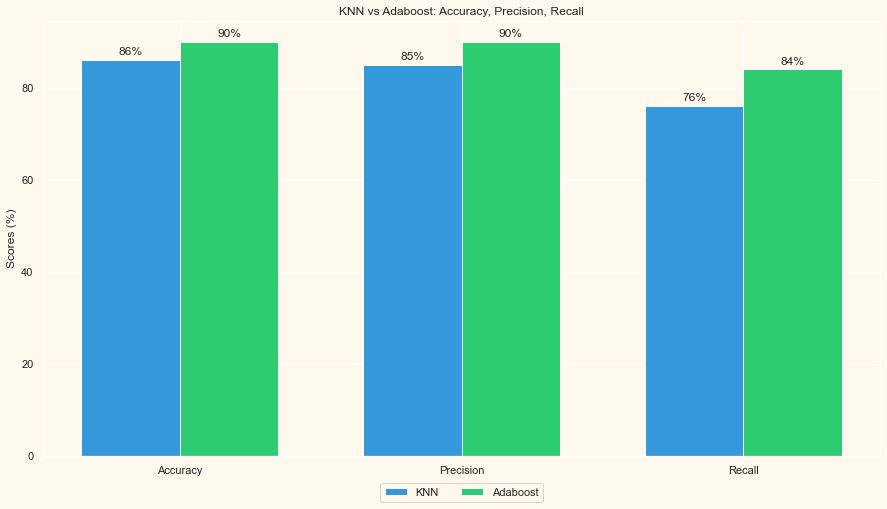

In [783]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Nilai-nilai akurasi, presisi, dan recall untuk KNN dan Adaboost
knn_accuracy = 0.86 * 100
knn_precision = 0.85 * 100
knn_recall = 0.76 * 100

adaboost_accuracy = 0.90 * 100
adaboost_precision = 0.90 * 100
adaboost_recall = 0.84 * 100

# Menyusun data untuk bar chart
labels = ['Accuracy', 'Precision', 'Recall']
knn_scores = [knn_accuracy, knn_precision, knn_recall]
adaboost_scores = [adaboost_accuracy, adaboost_precision, adaboost_recall]

x = range(len(labels))
width = 0.35

# Membuat bar chart dengan warna yang telah ditentukan
fig, ax = plt.subplots()
rects1 = ax.bar(x, knn_scores, width, label='KNN', color='#3498db')  # Biru untuk KNN (#3498db)
rects2 = ax.bar([i + width for i in x], adaboost_scores, width, label='Adaboost', color='#2ecc71')  # Hijau untuk Adaboost (#2ecc71)

ax.set_ylabel('Scores (%)')  # Mengubah label y-axis
ax.set_title('KNN vs Adaboost: Accuracy, Precision, Recall')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)

# Menambahkan nilai di atas setiap bar sebagai persentase (tanpa desimal)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}%'.format(height),  # Menampilkan nilai tanpa desimal dengan simbol persen
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Menempatkan legenda di bawah grafik bar
plt.legend(bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=2)

plt.show()


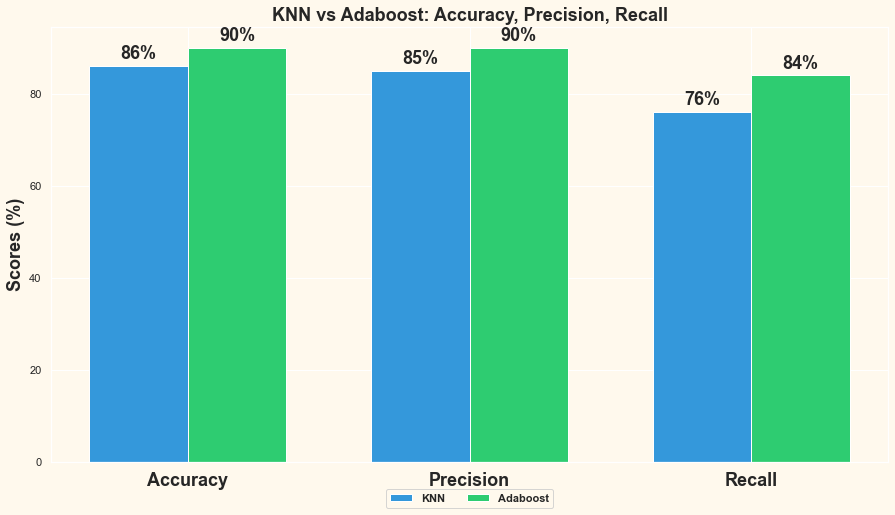

In [784]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Nilai-nilai akurasi, presisi, dan recall untuk KNN dan Adaboost
knn_accuracy = 0.86 * 100
knn_precision = 0.85 * 100
knn_recall = 0.76 * 100

adaboost_accuracy = 0.90 * 100
adaboost_precision = 0.90 * 100
adaboost_recall = 0.84 * 100

# Menyusun data untuk bar chart
labels = ['Accuracy', 'Precision', 'Recall']
knn_scores = [knn_accuracy, knn_precision, knn_recall]
adaboost_scores = [adaboost_accuracy, adaboost_precision, adaboost_recall]

x = range(len(labels))
width = 0.35

# Membuat bar chart dengan warna yang telah ditentukan
fig, ax = plt.subplots()
rects1 = ax.bar(x, knn_scores, width, label='KNN', color='#3498db')  # Biru untuk KNN (#3498db)
rects2 = ax.bar([i + width for i in x], adaboost_scores, width, label='Adaboost', color='#2ecc71')  # Hijau untuk Adaboost (#2ecc71)

# Mengatur ukuran font
font_title = {'size': 18, 'weight': 'bold'}
font_labels = {'size': 18, 'weight' : 'bold'}
font_ticks = {'size': 18, 'weight' : 'bold'}
font_autolabel = {'size': 18, 'weight': 'bold'}

ax.set_ylabel('Scores (%)', **font_labels)  # Mengubah label y-axis
ax.set_title('KNN vs Adaboost: Accuracy, Precision, Recall', **font_title)
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels, **font_ticks)

# Menambahkan nilai di atas setiap bar sebagai persentase (tanpa desimal)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}%'.format(height),  # Menampilkan nilai tanpa desimal dengan simbol persen
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    **font_autolabel)

autolabel(rects1)
autolabel(rects2)

# Menempatkan legenda di bawah grafik bar
plt.legend(bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=2, fontsize=14, prop={'weight': 'bold'})

plt.show()



In [785]:
import pickle
filename = 'adaboost_model.sav'
pickle.dump(adaboost_model, open(filename,'wb'))

In [786]:
# adaboost_model.predict(example)